# **TUGAS BESAR MACHINE LEARNING**

## **Deteksi *Web Page Phishing* Berdasarkan Fitur URL dengan Metode *Random Forest* dan *Long Short Term Memory* (LSTM)**

##BY KELOMPOK 11

Anggota Kelompok :
*   Ihsan Kamil          (1217070031)
*   Ilham Muzhafar Azhar (1217070032)
*   Zidan Aditya         (1217070089)

Link Dataset : https://www.kaggle.com/datasets/shashwatwork/web-page-phishing-detection-dataset

Link Youtube : https://youtu.be/Fy5oi_xwA5c


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customer_data = pd.read_csv('/content/dataset_phishing.csv')
customer_data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
import pandas as pd
from google.colab import files
import zipfile
import os

uploaded = files.upload()
zip_path = "Data Web Phising.zip"
extract_path = "/content/Data_Web_Phising"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(os.listdir(extract_path))
dataset_path = "/content/Data_Web_Phising/dataset_phishing.csv"
data = pd.read_csv(dataset_path)
print(data.head())


Saving Data Web Phising.zip to Data Web Phising.zip
['dataset_phishing.csv']
                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/Data_Web_Phising/dataset_phishing.csv')
data['status'] = data['status'].map({'legitimate': 0, 'phishing': 1})

X = data.drop(columns=['url', 'status'])
y = data['status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ========================= Random Forest =========================
start_time = time.time()
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
training_time_rf = time.time() - start_time

start_time = time.time()
y_pred_rf = rf_model.predict(X_test)
inference_time_rf = time.time() - start_time

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# ========================= LSTM =========================
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

y_train_lstm = to_categorical(y_train, num_classes=2)
y_test_lstm = to_categorical(y_test, num_classes=2)

lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1), activation='tanh'),
    Dense(2, activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, verbose=0)
training_time_lstm = time.time() - start_time

start_time = time.time()
y_pred_lstm_prob = lstm_model.predict(X_test_lstm)
inference_time_lstm = time.time() - start_time
y_pred_lstm = np.argmax(y_pred_lstm_prob, axis=1)

accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm)
recall_lstm = recall_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)
auc_lstm = roc_auc_score(y_test, y_pred_lstm_prob[:, 1])

# ========================= Summary =========================
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"AUC: {auc_rf:.4f}")
print(f"Training Time: {training_time_rf:.4f} seconds")
print(f"Inference Time: {inference_time_rf:.4f} seconds")

print("\nLSTM Metrics:")
print(f"Accuracy: {accuracy_lstm:.4f}")
print(f"Precision: {precision_lstm:.4f}")
print(f"Recall: {recall_lstm:.4f}")
print(f"F1-Score: {f1_lstm:.4f}")
print(f"AUC: {auc_lstm:.4f}")
print(f"Training Time: {training_time_lstm:.4f} seconds")
print(f"Inference Time: {inference_time_lstm:.4f} seconds")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Random Forest Metrics:
Accuracy: 0.9694
Precision: 0.9749
Recall: 0.9628
F1-Score: 0.9688
AUC: 0.9945
Training Time: 1.7920 seconds
Inference Time: 0.0401 seconds

LSTM Metrics:
Accuracy: 0.9374
Precision: 0.9325
Recall: 0.9415
F1-Score: 0.9370
AUC: 0.9823
Training Time: 155.5313 seconds
Inference Time: 1.3278 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


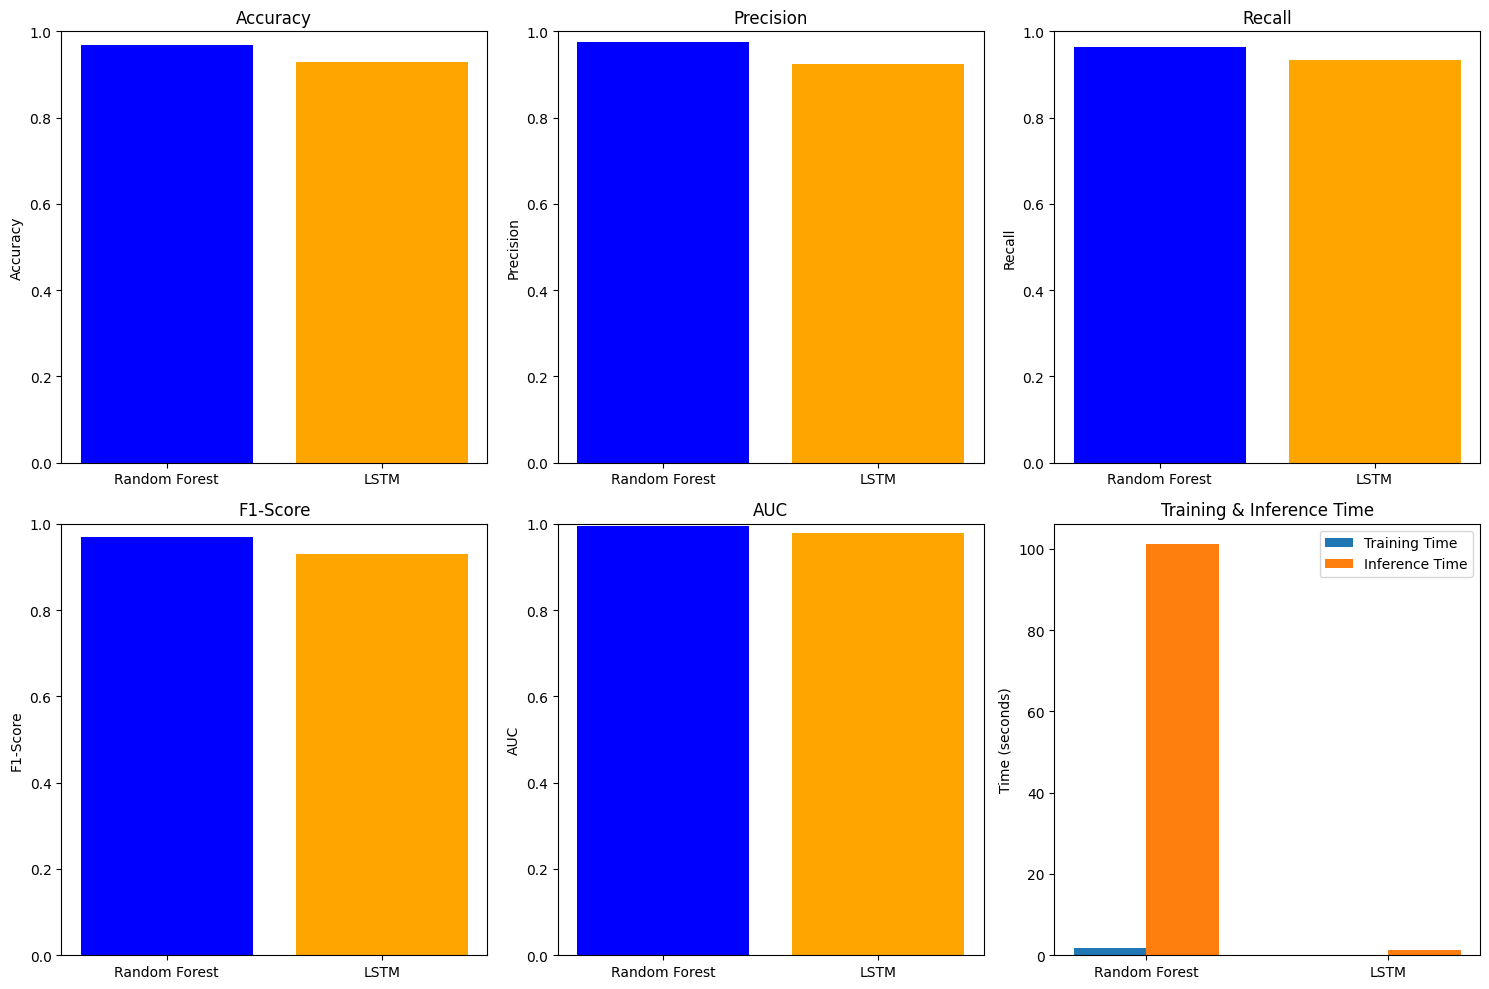

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Data_Web_Phising/dataset_phishing.csv')
data['status'] = data['status'].map({'legitimate': 0, 'phishing': 1})

X = data.drop(columns=['url', 'status'])
y = data['status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ========================= Random Forest =========================
start_time = time.time()
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
training_time_rf = time.time() - start_time

start_time = time.time()
y_pred_rf = rf_model.predict(X_test)
inference_time_rf = time.time() - start_time

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# ========================= LSTM =========================
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

y_train_lstm = to_categorical(y_train, num_classes=2)
y_test_lstm = to_categorical(y_test, num_classes=2)

lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1), activation='tanh'),
    Dense(2, activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, verbose=0)
training_time_lstm = time.time() - start_time

start_time = time.time()
y_pred_lstm_prob = lstm_model.predict(X_test_lstm)
inference_time_lstm = time.time() - start_time
y_pred_lstm = np.argmax(y_pred_lstm_prob, axis=1)

accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm)
recall_lstm = recall_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)
auc_lstm = roc_auc_score(y_test, y_pred_lstm_prob[:, 1])

models = ['Random Forest', 'LSTM']
accuracy = [accuracy_rf, accuracy_lstm]
precision = [precision_rf, precision_lstm]
recall = [recall_rf, recall_lstm]
f1_score = [f1_rf, f1_lstm]
auc = [auc_rf, auc_lstm]
training_time = [training_time_rf, training_time_lstm]
inference_time = [inference_time_rf, inference_time_lstm]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
values = [accuracy, precision, recall, f1_score, auc]

plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    plt.bar(models, values[i], color=['blue', 'orange'])
    plt.title(metric)
    plt.ylabel(metric)
    plt.ylim(0, 1)

plt.subplot(2, 3, 6)
time_metrics = ['Training Time', 'Inference Time']
time_values = [training_time, inference_time]
x = range(len(models))

for i, time_metric in enumerate(time_metrics):
    plt.bar([p + i*0.3 for p in x], [time[i] for time in time_values], width=0.3, label=time_metric)

plt.xticks([p + 0.3 / 2 for p in x], models)
plt.title('Training & Inference Time')
plt.ylabel('Time (seconds)')
plt.legend()

plt.tight_layout()
plt.show()
